In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd 
import requests
import json
import geodatasets as gds
import contextily as cx


In [ ]:
def jprint(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

bike = requests.get('https://gbfs.divvybikes.com/gbfs/en/station_information.json')
jprint(bike.json())

bike_json = bike.json()
bike_data = bike_json['data']['stations']
station = pd.DataFrame(bike_data)
station.info()

In [6]:
stations = station[['name', 'lat', 'lon']]
stations.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    1626 non-null   object 
 1   lat     1626 non-null   float64
 2   lon     1626 non-null   float64
dtypes: float64(2), object(1)
memory usage: 38.2+ KB


In [24]:
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.lon, df2.lat), crs="EPSG:4326")
gdf.head(5)

,name,Count,lat,lon,geometry
0,Streeter Dr & Grand Ave,15756,41.892278,-87.612043,POINT (-87.61204 41.89228)
1,DuSable Lake Shore Dr & Monroe St,8652,41.880958,-87.616743,POINT (-87.61674 41.88096)
2,Michigan Ave & Oak St,8333,41.900960,-87.623777,POINT (-87.62378 41.90096)
3,DuSable Lake Shore Dr & North Blvd,8281,41.911722,-87.626804,POINT (-87.62680 41.91172)
4,Wells St & Concord Ln,7796,41.912133,-87.634656,POINT (-87.63466 41.91213)


In [25]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [118]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [117]:
gdf.set_crs(epsg=4326, inplace=True)

,name,Count,lat,lon,geometry
0,Streeter Dr & Grand Ave,15756,41.892278,-87.612043,POINT (-87.61204 41.89228)
1,DuSable Lake Shore Dr & Monroe St,8652,41.880958,-87.616743,POINT (-87.61674 41.88096)
2,Michigan Ave & Oak St,8333,41.900960,-87.623777,POINT (-87.62378 41.90096)
3,DuSable Lake Shore Dr & North Blvd,8281,41.911722,-87.626804,POINT (-87.62680 41.91172)
4,Wells St & Concord Ln,7796,41.912133,-87.634656,POINT (-87.63466 41.91213)
5,Clark St & Elm St,7363,41.902973,-87.631280,POINT (-87.63128 41.90297)
6,Millennium Park,7336,41.881032,-87.624084,POINT (-87.62408 41.88103)
7,Kingsbury St & Kinzie St,7295,41.889177,-87.638506,POINT (-87.63851 41.88918)
8,Theater on the Lake,6966,41.926277,-87.630834,POINT (-87.63083 41.92628)
9,Wells St & Elm St,6578,41.903222,-87.634324,POINT (-87.63432 41.90322)


In [11]:
df = pd.read_csv('sample.csv', usecols=['start_station_name', 'start_lat', 'start_lng', 'member_casual'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   start_station_name  1000000 non-null  object 
 1   start_lat           1000000 non-null  float64
 2   start_lng           1000000 non-null  float64
 3   member_casual       1000000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 30.5+ MB


In [10]:
# group by station and check for unique coordinates
groupy = df.groupby('start_station_name')[['start_lat', 'start_lng']].nunique()
groupy


,start_lat,start_lng
start_station_name,,
111th St - Morgan Park Metra,1,1
2112 W Peterson Ave,87,86
410,1,1
532 E 43rd St,1,1
63rd & Western Ave - north corner,1,1
...,...,...
Woodlawn Ave & 75th St,5,5
Woodlawn Ave & Lake Park Ave,77,79
Yates Blvd & 75th St,14,14


In [12]:
df.rename(columns={'start_station_name': 'name', 'start_lat': 'lat', 'start_lng': 'lon'}, inplace=True)

In [13]:
df.head(5)

,name,lat,lon,member_casual
0,Bernard St & Elston Ave,41.949902,-87.713915,casual
1,McClurg Ct & Erie St,41.894352,-87.617831,member
2,Larrabee St & Division St,41.903486,-87.643353,member
3,Michigan Ave & Washington St,41.883693,-87.623919,casual
4,Loomis St & Jackson Blvd,41.877945,-87.662007,member


In [91]:
df.rename(columns={'start_station_name': 'name'}, inplace=True)
df.head(5)

,name
0,Bernard St & Elston Ave
1,McClurg Ct & Erie St
2,Larrabee St & Division St
3,Michigan Ave & Washington St
4,Loomis St & Jackson Blvd


In [27]:
top = df.groupby('name')['name'].agg(Count='count').sort_values(by='Count', ascending=False).head(10).reset_index()

In [17]:
top

,name,Count
0,Streeter Dr & Grand Ave,15756
1,DuSable Lake Shore Dr & Monroe St,8652
2,Michigan Ave & Oak St,8333
3,DuSable Lake Shore Dr & North Blvd,8281
4,Wells St & Concord Ln,7796
5,Clark St & Elm St,7363
6,Millennium Park,7336
7,Kingsbury St & Kinzie St,7295
8,Theater on the Lake,6966
9,Wells St & Elm St,6578


In [18]:
stations.head(5)

,name,lat,lon
0,Halsted St & 73rd St,41.761605,-87.644161
1,Kenton Ave & Madison St,41.880708,-87.741018
2,Prospect Sq & 91st St,41.728234,-87.667524
3,Aberdeen St & Randolph St,41.884114,-87.654264
4,Exchange Ave & 79th St,41.751731,-87.552812


In [28]:
df2 = top.merge(stations, on='name', how='left')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    10 non-null     object 
 1   Count   10 non-null     int64  
 2   lat     10 non-null     float64
 3   lon     10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [29]:
df2

,name,Count,lat,lon
0,Streeter Dr & Grand Ave,15756,41.892278,-87.612043
1,DuSable Lake Shore Dr & Monroe St,8652,41.880958,-87.616743
2,Michigan Ave & Oak St,8333,41.900960,-87.623777
3,DuSable Lake Shore Dr & North Blvd,8281,41.911722,-87.626804
4,Wells St & Concord Ln,7796,41.912133,-87.634656
5,Clark St & Elm St,7363,41.902973,-87.631280
6,Millennium Park,7336,41.881032,-87.624084
7,Kingsbury St & Kinzie St,7295,41.889177,-87.638506
8,Theater on the Lake,6966,41.926277,-87.630834
9,Wells St & Elm St,6578,41.903222,-87.634324


In [38]:
import textwrap

txt = 'Hi, my name is Andy. This is a text string. Practice stuff'
print(textwrap.fill(txt, width=20))

Hi, my name is Andy.
This is a text
string. Practice
stuff


In [30]:
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.lon, df2.lat), crs="EPSG:4326")
gdf.head(5)

,name,Count,lat,lon,geometry
0,Streeter Dr & Grand Ave,15756,41.892278,-87.612043,POINT (-87.61204 41.89228)
1,DuSable Lake Shore Dr & Monroe St,8652,41.880958,-87.616743,POINT (-87.61674 41.88096)
2,Michigan Ave & Oak St,8333,41.900960,-87.623777,POINT (-87.62378 41.90096)
3,DuSable Lake Shore Dr & North Blvd,8281,41.911722,-87.626804,POINT (-87.62680 41.91172)
4,Wells St & Concord Ln,7796,41.912133,-87.634656,POINT (-87.63466 41.91213)


In [ ]:
for i, r in gdf.iterrows():
    ax.annotate(r['name'], xy=(r.geometry.x, r.geometry.y))

In [ ]:
ax2.table(cellText=df[['Station Name', 'Count']].values, colLabels=['Station Name', 'Count'], loc='center')


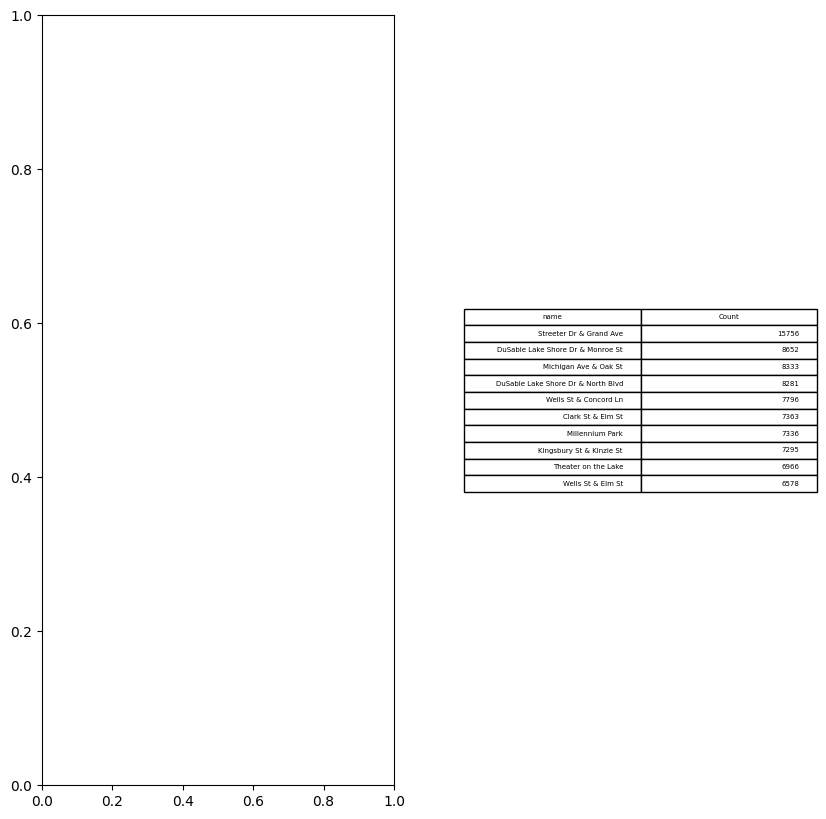

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ax2.axis('off')
ax2.table(cellText=df2[['name', 'Count']].values, colLabels=['name', 'Count'], loc='center')


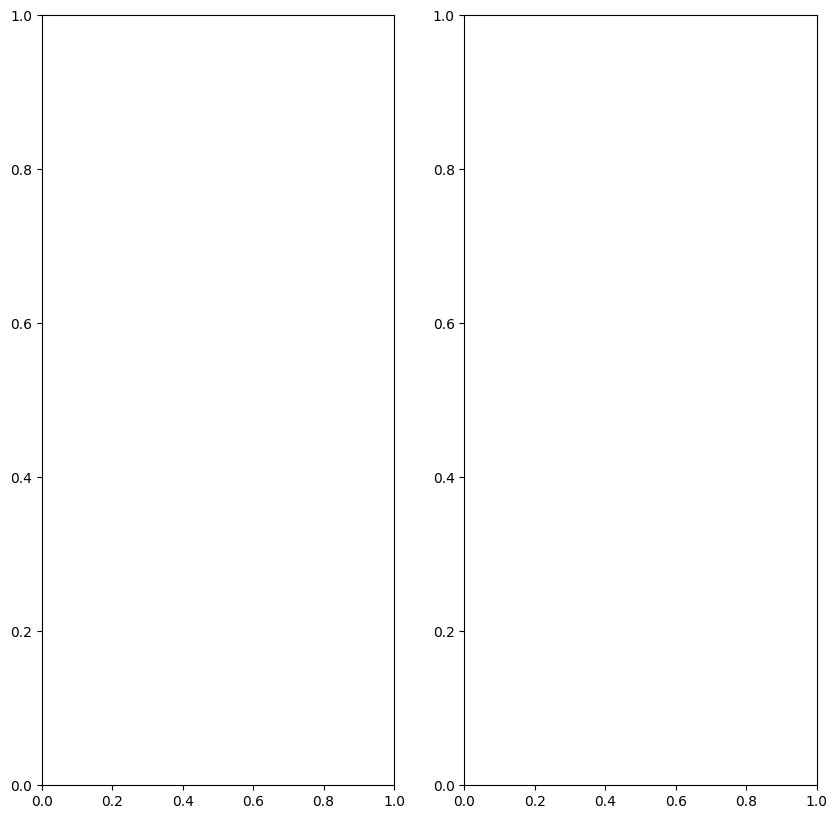

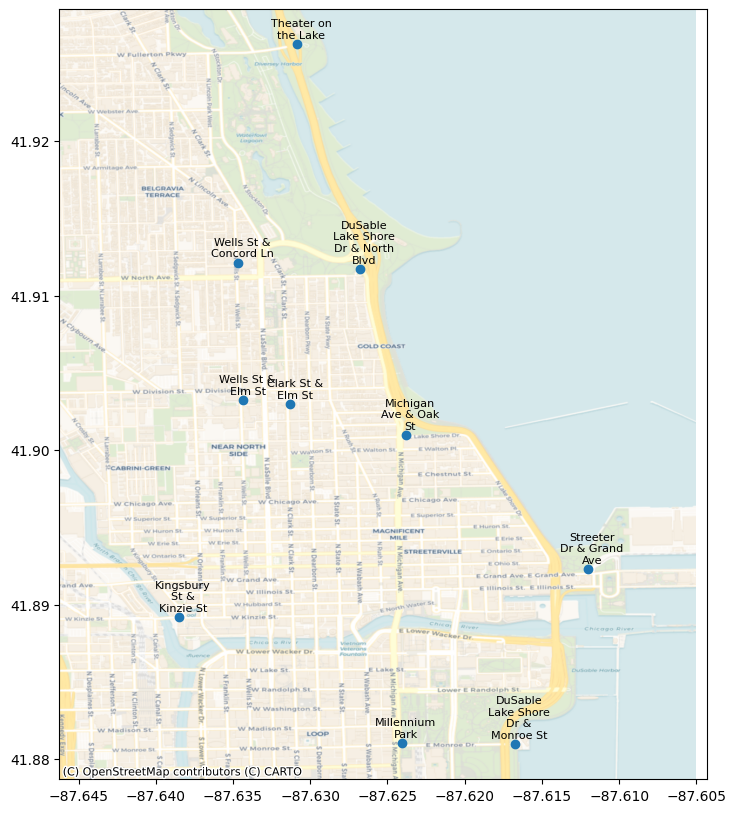

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1 = gdf.plot(figsize=(10, 10))
cx.add_basemap(ax1, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)


for i, r in gdf.iterrows():
    wrapped_text = textwrap.fill(r['name'], width=10)
    ax1.annotate(wrapped_text, xy=(r.geometry.x, r.geometry.y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='bottom')

buffer_ratio = 0.1
x_range = ax.get_xlim()[1] - ax.get_xlim()[0]
ax1.set_xlim(ax.get_xlim()[0] - buffer_ratio * x_range, ax.get_xlim()[1] + buffer_ratio * x_range)

plt.show()

# one map, one side by side bar plot

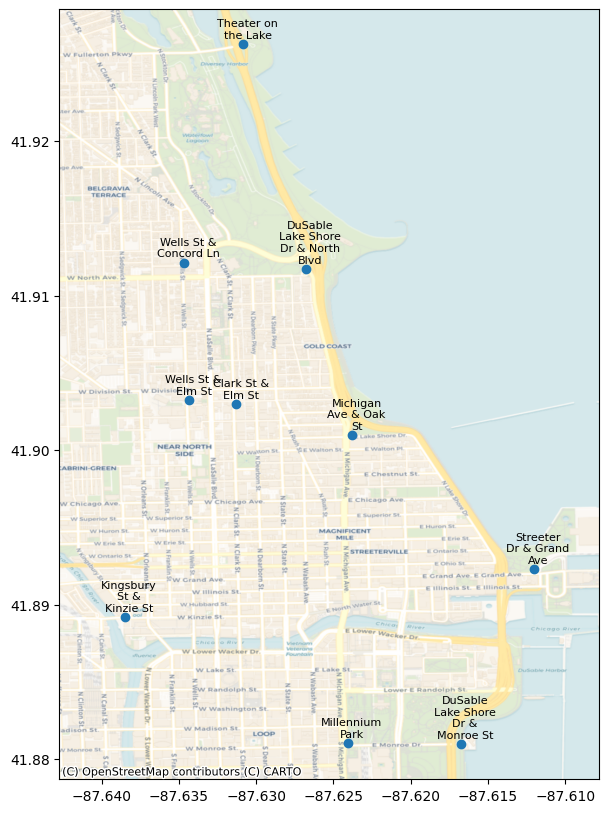

In [51]:
ax = gdf.plot(figsize=(10, 10))
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)


for i, r in gdf.iterrows():
    wrapped_text = textwrap.fill(r['name'], width=10)
    ax.annotate(wrapped_text, xy=(r.geometry.x, r.geometry.y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='bottom')

buffer_ratio = 0.1
x_range = ax.get_xlim()[1] - ax.get_xlim()[0]
ax.set_xlim(ax.get_xlim()[0] - buffer_ratio * x_range, ax.get_xlim()[1] + buffer_ratio * x_range)

plt.show()

In [ ]:
chicago = gpd.read_file(gds.get_path('geoda.chicago_health'))
chicago.head(5)

In [30]:
chicago.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS_1984",SPHEROID["WGS8 ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [40]:
chicago.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS_1984",SPHEROID["WGS8 ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [ ]:
chicago.centroid.explore()

In [37]:
ax = chicago.centroid.explore()
cx.add_basemap(ax, crs=chicago.crs.to_string())

C:\Users\Andy\AppData\Local\Temp\ipykernel_22432\1963832225.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax = chicago.centroid.explore()


AttributeError: 'Map' object has no attribute 'axis'

In [ ]:
station_list.drop(['electric_bike_surcharge_waiver', 'has_kiosk', 'rental_uris', 'eightd_has_key_dispenser', 'eightd_station_services', 'target_bike_capacity', 'target_scooter_capacity', 'region_id', 'region_code', 'client_station_id', 'rack_model'], axis=1, inplace=True)